# **Validasi Vocabulary untuk Dataset Lazada Indonesian Reviews**
## Kontributor: Rakha Abadi Susilo, Gary Dimitri Hamidi, Nur Aini Rakhmawati
## Email Kontributor: 05211840000102@mahasiswa.integra.its.ac.id, dimitri.18052@mhs.its.ac.id, nur.aini@is.its.ac.id
## *Departemen Sistem Informasi, Institut Teknologi Sepuluh Nopember*

## **Abstrak**

Lazada merupakan salah satu *e-commerce* terbesar di dunia. Salah satu negara di mana Lazada menyediakan jasa mereka adalah di Indonesia. Di Indonesia, Lazada menengahi berbagai transaksi dalam berbagai bidang, salah satunya adalah barang elektronik. Pada paper ini dilakukan validasi terhadap *vocabulary* produk-produk elektronik yang ada di Lazada yang telah dibuat sebelumnya untuk mempelajari bagaimana SHACL melakukan validasi*vocabulary*.Pada penelitian ini  validasi *vocabulary* dilakukan dengan *Shapes Constraint Language* (SHACL). Aturan SHACL dibuat terlebih dahulu untuk menentukan batasan-batasan pada *vocabulary*, lalu dibuat dua *instance*: satu *instance* invalid (yang menyalahi aturan) dan satu *instance* valid (yang sesuai dengan aturan). Dibuat dua instance untuk melihat perbedaan hasil SHACL antara *instance* dengan aturan yang benar dan salah.


***Keyword: lazada, shacl, turtle, vocabulary, xml.***

## **Vocabulary**


Vocabulary ini terdiri atas 4 class dan 9 properti. Vocabulary ini dapat diakses pada [3] dan dataset dapat diakses pada [2].


#### **Classes**

* **gr:SomeItems**. Contoh: beli-smart-tv. Propertinya adalah:
 * **gr:category [xsd:string]**: beli-smart-tv category "beli-smart-tv".
 * **gr:hasBrand [gr:Brand]**: beli-smart-tv hasBrand Toshiba.

<br>

* **gr:Brand**. Contoh: Toshiba. Propertinya adalah:
 * **gr:name [xsd:string]**: Toshiba name "Toshiba".

<br>

* **gr:UnitPriceSpecification**. Contoh: Harga. Propertinya adalah:
 * **gr:hasCurrencyValue [xsd:currency]**.

<br>

* **gr:ProductOrServiceModel**. Contoh: TOSHIBA_Smart_HD_LED_TV_32. Propertinya adalah: 
 * **gr:name [xsd:string]**: TOSHIBA_Smart_HD_LED_TV_32 name "TOSHIBA Smart HD LED TV 32".
 * **gr:hasBrand [xsd:string]**: TOSHIBA_Smart_HD_LED_TV_32 hasBrand Toshiba.
 * **gr:hasPriceSpecification [gr:UnitPriceSpecification]**: TOSHIBA_Smart_HD_LED_TV_32 hasPriceSpecification Harga.
 * **s:aggregateRating [s:AggregateRating; s:ratingValue; s:reviewCount]**: TOSHIBA_Smart_HD_LED_TV_32 AggregateRating; TOSHIBA_Smart_HD_LED_TV_32 ratingValue 4; TOSHIBA_Smart_HD_LED_TV_32 reviewCount 8.
 * **s:dateCreated [xsd:date]**: TOSHIBA_Smart_HD_LED_TV_32 dateCreated 2019-10-02.

#### **Instance**

Berikut merupakan salah satu instance berdasarkan class dan properti sebelumnya beserta graphnya.

<br>


In [ ]:
!pip3 install --no-input --quiet jupyter-rdfify
%reload_ext jupyter-rdfify

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyshacl 0.17.0.post2 requires rdflib<7,>=6.0.0, but you have rdflib 5.0.0 which is incompatible.


/usr/local/lib/python3.7/dist-packages/rdflib_jsonld/__init__.py:12: DeprecationWarning: The rdflib-jsonld package has been integrated into rdflib as of rdflib==6.0.1.  Please remove rdflib-jsonld from your project's dependencies.
  DeprecationWarning,


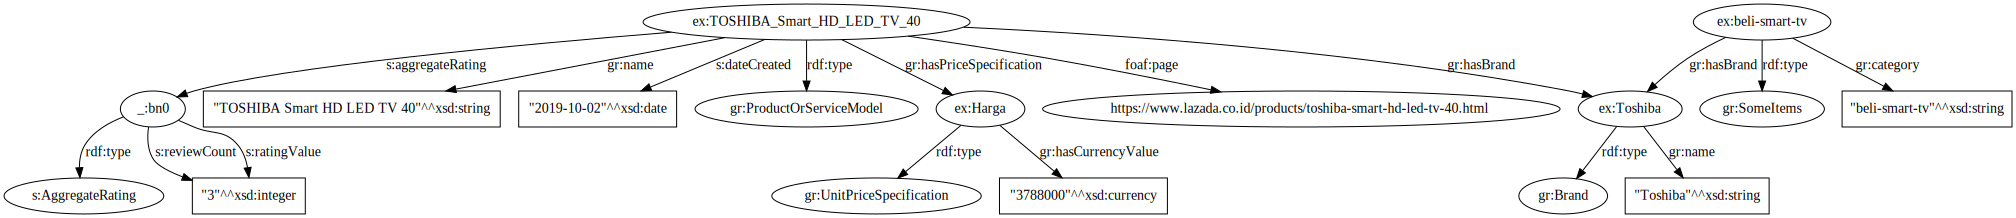

In [ ]:
%%rdf turtle
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix ex: <http://example.com/> .
@prefix gr: <http://purl.org/goodrelations/v1#> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix s: <http://schema.org/> .

ex:beli-smart-tv a gr:SomeItems;
  gr:category "beli-smart-tv"^^xsd:string;
  gr:hasBrand ex:Toshiba .

ex:Toshiba a gr:Brand;
    gr:name "Toshiba"^^xsd:string.

ex:Harga a gr:UnitPriceSpecification;
  gr:hasCurrencyValue "3788000"^^xsd:integer.

ex:TOSHIBA_Smart_HD_LED_TV_40 a gr:ProductOrServiceModel;
  gr:name "TOSHIBA Smart HD LED TV 40"^^xsd:string;
  gr:hasBrand ex:Toshiba;
  gr:hasPriceSpecification ex:Harga;
  foaf:page <https://www.lazada.co.id/products/toshiba-smart-hd-led-tv-40.html>;
  s:aggregateRating [ a s:AggregateRating;
                         s:ratingValue "3"^^xsd:integer;
                         s:reviewCount "3"^^xsd:integer;
                          ];
  s:dateCreated "2019-10-02"^^xsd:date.


## **SHACL Constraints** 



Berikut adalah aturan-aturan SHACL pada vocabulary yang telah dibuat sebelumnya: 
* **SHACL *instance* **```gr:SomeItems```** ...
 * ...  hanya dapat memiliki satu *value* untuk properti ```gr:category```, dan *value* ini bersifat literal dengan tipe data ```xsd:string```.
 * ...  dapat memiliki jumlah *value* yang tak terbatas untuk properti ```gr:hasBrand```, dan *value* hanya dapat diambil dari class ```ex:Brand```.
 * ... tidak dapat memiliki *value* untuk properti apapun selain terhadap properti ```gr:category``` dan ```gr:hasBrand```.

<br>

* **SHACL *instance* **```gr:Brand```** ...
 * ... hanya dapat memiliki satu *value* untuk properti ```gr:name```, dan *value* ini bersifat literal dengan tipe data ```xsd:string```.
 * ...  tidak dapat memiliki *value* untuk properti apapun selain terhadap properti ```gr:name```.

<br>

* **SHACL *instance* ```gr:UnitPriceSpecification```** ...
 * ...  dapat memiliki jumlah *value* yang tak terbatas untuk properti ```gr:hasCurrencyValue```, dan *value* ini bersifat literal dengan tipe data ```xsd:integer```.
 * ... tidak dapat memiliki *value* untuk properti apapun selain terhadap properti ```gr:hasCurrencyValue```.

<br>

* **SHACL *instance* ```s:AggregateRating```** ...
 * ... dapat memiliki jumlah *value* yang tak terbatas untuk properti ```gr:ratingValue```, dan *value* ini bersifat literal dengan tipe data ```xsd:integer```.
 * ... dapat memiliki jumlah *value* yang tak terbatas untuk properti ```gr:reviewCount```, dan *value* ini bersifat literal dengan tipe data ```xsd:integer```.
 * ... tidak dapat memiliki *value* untuk properti apapun selain terhadap properti ```gr:ratingValue``` dan ```gr:reviewCount``` .

<br>

* **SHACL *instance* ```gr:ProductOrServiceModel```** ...
 * ... dapat memiliki jumlah *value* yang tak terbatas untuk properti ```gr:name```, dan *value* ini bersifat literal dengan tipe data ```xsd:string```.
 * ... hanya dapat memiliki satu *value* untuk properti ```gr:hasBrand```, dan *value* hanya dapat diambil dari class ```gr:Brand```.
 * ... hanya dapat memiliki satu *value* untuk properti ```gr:hasPriceSpecification```, dan *value* hanya dapat diambil dari class ```gr:Harga```.
 * ... hanya dapat memiliki satu *value* untuk properti ```foaf:page```.
 * ... hanya dapat memiliki satu *value* untuk properti ```s:dateCreated```, dan *value* ini bersifat literal dengan tipe data ```xsd:date```.
 * ... hanya dapat memiliki satu *value* untuk properti ```s:aggregateRating```, dan *value* hanya dapat diambil dari class ```s:AggregateRating```.
 * ... tidak dapat memiliki *value* untuk properti apapun selain terhadap properti ```gr:name```, ```gr:hasBrand```,```gr:hasPriceSpecification```, ```foaf:page```, ```s:dateCreated```, dan ```s:aggregateRating```.

<br>

Aturan SHACL tersebut kemudian dimasukkan ke dalam variabel ```shapes_graph``` yang kemudian akan dilakukan validasi terhadap salah satu instancenya menggunakan library *pyshacl*.

<br>

In [ ]:
shapes_graph = """
@prefix sh:     <http://www.w3.org/ns/shacl#> .
@prefix xsd:    <http://www.w3.org/2001/XMLSchema#> .
@prefix schema: <http://schema.org/> .
@prefix ex: <http://example.com/> .
@prefix gr: <http://purl.org/goodrelations/v1#> .
@prefix s: <http://schema.org/> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .

ex:CategoryShape a sh:NodeShape;
sh:targetClass gr:SomeItems;
    sh:property [
        sh:path gr:category ;
        sh:datatype xsd:string ;
        sh:maxCount 1;
    ];

    sh:property [
        sh:path gr:hasBrand ;
        sh:class gr:Brand;
    ].

gr:BrandShape a sh:NodeShape;
sh:targetClass gr:Brand;
    sh:property [
        sh:path gr:name ;
        sh:datatype xsd:string ;
        sh:maxCount 1;
    ].

ex:HargaShape a sh:NodeShape;
sh:targetClass gr:UnitPriceSpecification;
    sh:property [
        sh:path gr:hasCurrencyValue ;
        sh:datatype xsd:integer ;
    ].

ex:RatingShape a sh:NodeShape;
sh:targetClass s:AggregateRating;
    sh:property [
        sh:path s:ratingValue;
        sh:datatype xsd:integer ;
    ];
    sh:property [
        sh:path s:reviewCount;
        sh:datatype xsd:integer ;
    ].

ex:ProductShape a sh:NodeShape;
sh:targetClass gr:ProductOrServiceModel;
    sh:property [
        sh:path gr:name;
        sh:datatype xsd:string ;
    ];
    sh:property [
        sh:path gr:hasBrand ;
        sh:class gr:Brand;
        sh:maxCount 1;
    ];
    sh:property [
        sh:path gr:hasPriceSpecification ;
        sh:targetClass ex:Harga;
        sh:maxCount 1;
    ];
    sh:property [
        sh:path foaf:page ;
        sh:maxCount 1;
    ];
    sh:property [
        sh:path s:dateCreated ;
        sh:datatype xsd:date ;
        sh:maxCount 1;
    ];
   sh:property [
        sh:path s:aggregateRating ;
        sh:targetClass s:AggregateRating;
        sh:maxCount 1;
    ].
"""

## **Data Graph**



Kemudian dibuat dua buah instance: : satu *instance* invalid (yang menyalahi aturan sebelumnya) dan satu *instance* valid (yang sesuai dengan aturan sebelumnya). Ini bertujuan agar perbedaan hasil SHACL antara *instance* dengan aturan yang benar dan salah dapat terlihat. Instance yang valid dimasukkan ke dalam variabel ```data_graph_valid``` dan instance yang invalid dimasukkan ke dalam variabel ```data_graph_invalid```.

<br>

In [ ]:
data_graph_valid = """
@prefix sh:     <http://www.w3.org/ns/shacl#> .
@prefix xsd:    <http://www.w3.org/2001/XMLSchema#> .
@prefix schema: <http://schema.org/> .
@prefix ex: <http://example.com/> .
@prefix gr: <http://purl.org/goodrelations/v1#> .
@prefix s: <http://schema.org/> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .

## Data Valid
ex:Toshiba a gr:Brand;
    gr:name "Toshiba"^^xsd:string.

ex:beli-smart-tv a gr:SomeItems;
  gr:category "beli-smart-tv"^^xsd:string;
  gr:hasBrand ex:Toshiba .

ex:Harga a gr:UnitPriceSpecification;
  gr:hasCurrencyValue "3788000"^^xsd:integer.

  ex:TOSHIBA_Smart_HD_LED_TV_40 a gr:ProductOrServiceModel;
  gr:name "TOSHIBA Smart HD LED TV 40"^^xsd:string;
  gr:hasBrand ex:Toshiba;
  gr:hasPriceSpecification ex:Harga;
  foaf:page <https://www.lazada.co.id/products/toshiba-smart-hd-led-tv-40.html>;
  s:aggregateRating [ a s:AggregateRating;
                         s:ratingValue "3"^^xsd:integer;
                         s:reviewCount "3"^^xsd:integer;
                          ];
  s:dateCreated "2019-10-02"^^xsd:date.

"""

In [ ]:
data_graph_invalid = """
@prefix sh:     <http://www.w3.org/ns/shacl#> .
@prefix xsd:    <http://www.w3.org/2001/XMLSchema#> .
@prefix schema: <http://schema.org/> .
@prefix ex: <http://example.com/> .
@prefix gr: <http://purl.org/goodrelations/v1#> .
@prefix s: <http://schema.org/> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .

## Data Invalid
ex:Toshiba a ex:Brand;
    gr:name "Toshiba"^^xsd:string.

ex:beli-smart-tv a gr:SomeItems;
  gr:category "beli-smart-tv"^^xsd:string;
  gr:hasBrand ex:Toshiba .

ex:Harga a gr:UnitPriceSpecification;
  gr:hasCurrencyValue "3788000"^^xsd:integer.

  ex:TOSHIBA_Smart_HD_LED_TV_40 a gr:ProductOrServiceModel;
  gr:name "TOSHIBA Smart HD LED TV 40"^^xsd:integer;
  gr:hasBrand ex:Toshiba;
  gr:hasPriceSpecification ex:Harga;
  foaf:page <https://www.lazada.co.id/products/toshiba-smart-hd-led-tv-40.html>;
  s:aggregateRating [ a s:AggregateRating;
                         s:ratingValue "3"^^xsd:integer;
                         s:reviewCount "3"^^xsd:integer;
                          ];
  s:dateCreated "2019-10-02"^^xsd:date.

"""

## **Validasi SHACL**

Terakhir, dilakukan validasi dua *instance* sebelumnya menggunakan *psyhacl* berdasarkan aturan yang ada pada variabel ```shapes_graph```. Dibuat sebuah function *validate_instance* untuk melakukan validasi.

<br>

In [ ]:
!pip3 install --no-input --quiet pyshacl

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sparqlslurper 0.4.1 requires rdflib~=5.0, but you have rdflib 6.0.1 which is incompatible.
pyshexc 0.8.3 requires rdflib~=5.0, but you have rdflib 6.0.1 which is incompatible.
pyshex 0.7.20 requires rdflib~=5.0, but you have rdflib 6.0.1 which is incompatible.


In [ ]:
import pyshacl

def validate_instance (data):
    results = pyshacl.validate(
    data,
    shacl_graph=shapes_graph,
    data_graph_format="ttl",
    shacl_graph_format="ttl",
    inference="rdfs",
    debug=True,
    serialize_report_graph="ttl",
    )

    conforms, report_graph, report_text = results
    return conforms

Jika *instance* telah memenuhi aturan yang dibuat sebelumnya, maka akan  muncul ```True``` pada output.

<br>

In [ ]:
print("data_graph_valid conforms?", validate_instance(data_graph_valid))

data_graph_valid conforms? True


Namun jika *instance* masih belum memenuhi aturan, maka akan akan muncul ```False``` pada output dan akan dijelaskan di bagian mana pelanggaran aturan tersebut terjadi.

<br>

In [ ]:
print("data_graph_invalid conforms?", validate_instance(data_graph_invalid))

Constraint Violation in ClassConstraintComponent (http://www.w3.org/ns/shacl#ClassConstraintComponent):
	Severity: sh:Violation
	Source Shape: [ sh:class gr:Brand ; sh:path gr:hasBrand ]
	Focus Node: ex:beli-smart-tv
	Value Node: ex:Toshiba
	Result Path: gr:hasBrand
	Message: Value does not have class gr:Brand

Constraint Violation in DatatypeConstraintComponent (http://www.w3.org/ns/shacl#DatatypeConstraintComponent):
	Severity: sh:Violation
	Source Shape: [ sh:datatype xsd:string ; sh:path gr:name ]
	Focus Node: ex:TOSHIBA_Smart_HD_LED_TV_40
	Value Node: Literal("TOSHIBA Smart HD LED TV 40" = None, datatype=xsd:integer)
	Result Path: gr:name
	Message: Value is not Literal with datatype xsd:string

Constraint Violation in ClassConstraintComponent (http://www.w3.org/ns/shacl#ClassConstraintComponent):
	Severity: sh:Violation
	Source Shape: [ sh:class gr:Brand ; sh:maxCount Literal("1", datatype=xsd:integer) ; sh:path gr:hasBrand ]
	Focus Node: ex:TOSHIBA_Smart_HD_LED_TV_40
	Value Node:

data_graph_invalid conforms? False


## Daftar Pustaka








1.   Rakhmawati, N. A. (2015). Semantic Web dan Linked Data. Yogyakarta, Indonesia: SiBuku.
2. Rakha Abadi Susilo, Gary Dimitri Hamidi, & Nur Aini Rakhmawati. (2021). garydh/tekweb-tugas-4/: Release v0.1 (v0.1) [Data set]. Zenodo. DOI: https://doi.org/10.5281/zenodo.5520953
3. Hamidi, Gary & Susilo, Rakha & Rakhmawati, Nur. (2021). Vocabulary Lazada Indonesian Reviews. https://doi.org/10.13140/RG.2.2.26475.26400. 
4. Holger Knublauch and Dimitris Kontokostas. Shapes constraint language (SHACL). W3C Working Draft, https://www.w3.org/TR/2017/WD-shacl-20170202
5. Rakha Abadi Susilo, Gary Dimitri Hamidi, & Nur Aini Rakhmawati. (2021). garydh/tekweb-tugas-5/: Release v0.1 (v0.1). Zenodo. DOI: https://doi.org/10.5281/zenodo.5548630